- The results from the validation of three cases has been analzed here:


Note:
- All of the input files was generated from the jupyter notebooks: {Case_name}_pestpp_fileprep
- The outputs was analyzed from the jupyter notebooks: Output_analysis_{Case_name}. The corresponding files were extracted from these jupyter notebook to be analyzed here.

The following files will be analyzed in this notebook:
1. Simulated temperature and moisture 
2. Surface energy balance (SEB) with active layer depth 
3. Surface water balance (SWB) with active layer depth
4. SEB and SWB with active layer depth 


A comparison for the three cases will be made here!

In [1]:
#import sys
#sys.path.insert(0,'../pestools')

In [2]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/datamshapratirupa/10_finalsim


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### Reading the input datasets

In [41]:
### Reading the excel sheet for Case 1 and Case 2
data_AWS_input_cyclic = pd.read_csv('../1_data_prep/Input_data_Finalsim/Finalsim_input.csv',sep=',',index_col=0)

data_AWS_input_cyclic.head()

,air temperature [K],Soil temperature at - 0.00 m [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),precipitation snow [m SWE s^-1]_sd0.1,precipitation snow [m SWE s^-1]_sd0.2,precipitation snow [m SWE s^-1]_sd0.45,precipitation snow [m SWE s^-1]_sd0.04,precipitation snow [m SWE s^-1]_sd0.01
TIMESTAMP,,,,,,,,,,,
1,260.219613,258.657858,5.959927,0.0,0.250777,146.394057,1.481626e-08,2.963252e-08,6.667318e-08,5.926505e-09,1.481626e-09
1,260.339877,259.027009,4.961648,0.0,0.297514,130.161964,2.411262e-10,4.822523e-10,1.085068e-09,9.645046e-11,2.411262e-11
1,258.946128,258.450812,4.406385,0.0,0.523100,105.254937,1.446759e-10,2.893519e-10,6.510417e-10,5.787037e-11,1.446759e-11
1,258.590429,258.345566,4.906929,0.0,0.458608,117.272839,5.304780e-10,1.060956e-09,2.387151e-09,2.121912e-10,5.304780e-11
1,259.890134,259.327757,5.046729,0.0,0.327822,144.499083,2.893519e-10,5.787037e-10,1.302083e-09,1.157407e-10,2.893519e-11


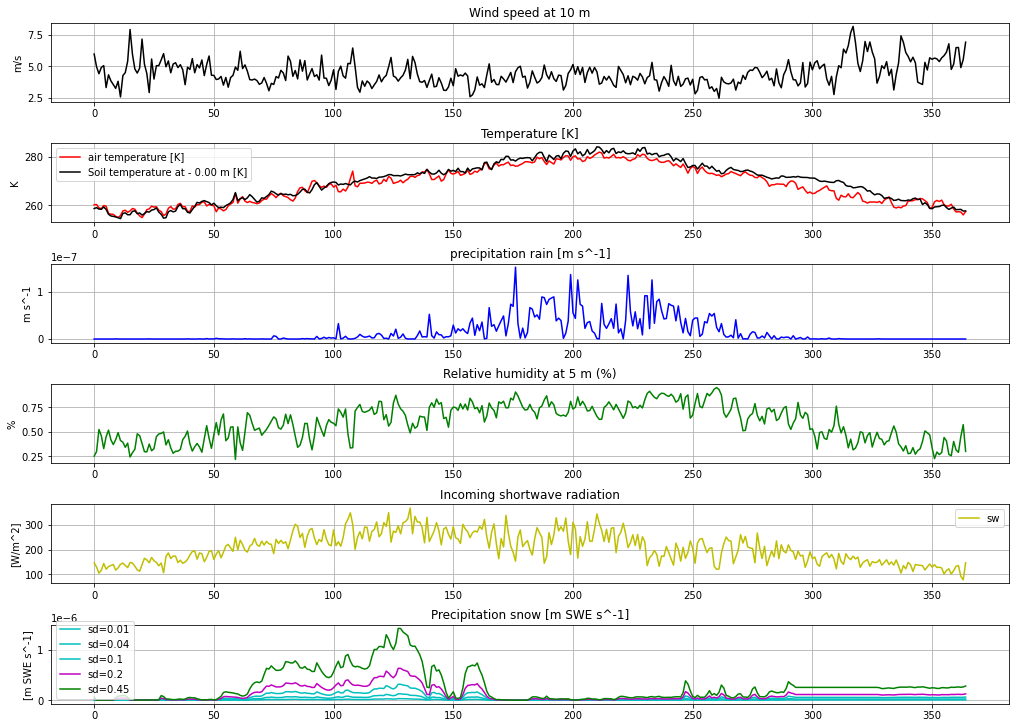

In [42]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_input_cyclic['Wind speed at 10 m (m/s)'].values,'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Temperature [K]')
f2_ax2.plot(data_AWS_input_cyclic['air temperature [K]'].values, 'r',label='air temperature [K]')
f2_ax2.plot(data_AWS_input_cyclic['Soil temperature at - 0.00 m [K]'].values, 'k',label='Soil temperature at - 0.00 m [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_AWS_input_cyclic['precipitation rain [m s^-1]'].values, 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_input_cyclic['Relative humidity at 5 m (%)'].values, 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_AWS_input_cyclic['Incoming shortwave radiation (W/m^2)'].values, 'y',label='sw')
f2_ax5.set_ylabel('[W/m^2]')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

f2_ax6.set_title('Precipitation snow [m SWE s^-1]')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.01'].values, 'c',label='sd=0.01')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.04'].values, 'c',label='sd=0.04')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.1'].values, 'c',label='sd=0.1')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.2'].values, 'm',label='sd=0.2')
f2_ax6.plot(data_AWS_input_cyclic['precipitation snow [m SWE s^-1]_sd0.45'].values, 'g',label='sd=0.45')
f2_ax6.set_ylabel('[m SWE s^-1]')
#f2_ax1.set_xlabel('Date')
f2_ax6.legend()
f2_ax6.grid(True)

In [43]:
### Reading the excel sheet for Case 3
data_AWS_input_cyclic_Case3 = pd.read_csv('../1_data_prep/Final_InputData_Case3/Finalsim_inputdata_Case3.csv',sep=',',index_col=0)

data_AWS_input_cyclic_Case3.head()

,air temperature [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2),SWE(m/s)_sd045
TIMESTAMP,,,,,,
1,261.384122,6.292142,0.0,0.222796,144.137767,1.659614e-07
1,261.360351,5.078059,0.0,0.249806,138.719406,1.609701e-07
1,260.239583,4.850806,0.0,0.445328,121.699417,1.621636e-07
1,260.456587,6.320802,0.0,0.369264,127.900927,1.574978e-07
1,261.024340,5.272229,0.0,0.260387,147.837316,1.482205e-07


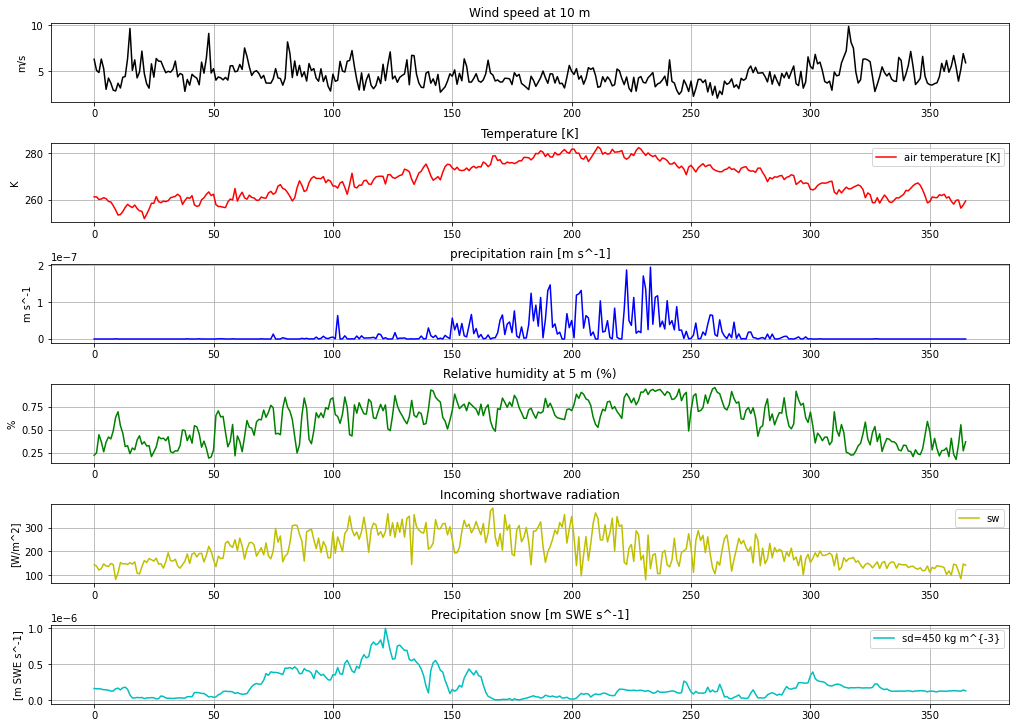

In [47]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_input_cyclic_Case3['Wind speed at 10 m (m/s)'].values,'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Temperature [K]')
f2_ax2.plot(data_AWS_input_cyclic_Case3['air temperature [K]'].values, 'r',label='air temperature [K]')
#f2_ax2.plot(data_AWS_input_cyclic_Case3['Soil temperature at - 0.00 m [K]'].values, 'k',label='Soil temperature at - 0.00 m [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
f2_ax2.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_AWS_input_cyclic_Case3['precipitation rain [m s^-1]'].values, 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_input_cyclic_Case3['Relative humidity at 5 m (%)'].values, 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'].values, 'y',label='sw')
f2_ax5.set_ylabel('[W/m^2]')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

f2_ax6.set_title('Precipitation snow [m SWE s^-1]')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax6.plot(data_AWS_input_cyclic_Case3['SWE(m/s)_sd045'].values, 'c',label='sd=450 kg m^{-3}')
f2_ax6.set_ylabel('[m SWE s^-1]')
#f2_ax1.set_xlabel('Date')
f2_ax6.legend()
f2_ax6.grid(True)

### Reading the observations

In [48]:
df_obs_AWS_cyclic = pd.read_csv('../1_data_prep/Finalsim_OutputData/Finalsim_outputdata_cyclic.csv',sep='\t',index_col=0)
df_obs_AWS_cyclic.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,7.491743,7.892918,8.429340,8.874757,5.329406,3.713087,5.215873,-14.492142,-13.853212,-12.741701,-12.164062,-10.756979,-8.778948,-5.870307,-4.427099
1,7.541509,7.935122,8.462483,8.873472,5.311170,3.687955,5.180101,-14.122991,-13.348594,-12.317205,-11.859913,-10.680122,-8.876974,-6.061526,-4.609814
2,7.540944,7.940477,8.474167,8.882240,5.300710,3.666684,5.138069,-14.699188,-13.470538,-12.329219,-11.794983,-10.588594,-8.901476,-6.220917,-4.778929
3,7.506554,7.908460,8.447569,8.867760,5.292469,3.649474,5.108906,-14.804434,-13.809740,-12.635677,-12.019965,-10.690191,-8.956571,-6.345726,-4.928622
4,7.520783,7.915139,8.441406,8.848924,5.278311,3.634222,5.082649,-13.822243,-13.422899,-12.420781,-11.957604,-10.778837,-9.065156,-6.464932,-5.065253


In [49]:
# df_obs_AWS_III = pd.read_csv('../1_data_prep/Final_OutputData_Case3/Valid_outputdata_Case3_2017.csv',sep='\t')
# df_obs_AWS_III.head()

### Reading the results

In [51]:
case1_obs = pd.read_csv('Case1_finalsim.demo/observations.dat',skiprows=190,sep=' ')
case2_obs = pd.read_csv('Case2_finalsim_2.demo/observations.dat',skiprows=304,sep=' ')
case3_obs = pd.read_csv('Case3_finalsim_2.demo/observations.dat',skiprows=262,sep=' ')


case1_obs.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.01 saturation ice,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice
0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,270.389262,269.083891,...,0.102650,0.102650,0.060400,0.018961,0.298879,0.736122,0.838199,0.838198,0.83818,0.838193
1,86400.0,259.502493,260.718837,262.269425,263.243814,264.966312,266.715032,267.981638,270.379574,269.087661,...,0.102539,0.102539,0.060319,0.018900,0.298873,0.736120,0.838186,0.838198,0.83818,0.838193
2,172800.0,259.250034,260.802973,262.471564,263.430522,265.003549,266.621471,267.847808,270.367917,269.091431,...,0.102563,0.102563,0.060312,0.018884,0.298872,0.736121,0.838177,0.838199,0.83818,0.838193
3,259200.0,259.161761,260.811283,262.553275,263.523042,265.029505,266.550426,267.732250,270.354777,269.095199,...,0.102571,0.102571,0.060311,0.018877,0.298871,0.736121,0.838170,0.838199,0.83818,0.838193
4,345600.0,259.852597,261.193522,262.750279,263.643778,265.056700,266.494512,267.632169,270.340199,269.098964,...,0.102508,0.102508,0.060279,0.018862,0.298870,0.736122,0.838165,0.838200,0.83818,0.838192


In [52]:
case2_obs.head()

,time [s],surface energy source [MW m^-2],conducted energy flux [W m^-2],latent heat of evaporation [W m^-2],sensible heat flux [W m^-2],surface-subsurface energy flux [W m^-2],evaporation rate [m s^-1],surface-subsurface flux [m s^-1],surface-precipitation rain [m s^-1],discharge [mol s^-1],...,point -0.01 saturation ice,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice
0,0.0,0.000109,0.0,-0.514117,40.318022,0.000000,1.819919e-10,0.0,0.0,0.0,...,0.098458,0.098458,0.481188,0.503211,0.707901,0.723273,0.723252,0.723227,0.723141,0.723210
1,86400.0,-0.000004,0.0,-0.624777,-53.374496,0.000004,2.209514e-10,0.0,0.0,0.0,...,0.097761,0.097761,0.481154,0.503231,0.707899,0.723274,0.723253,0.723229,0.723142,0.723209
2,172800.0,-0.000009,0.0,-0.395276,-44.533979,0.000009,1.398693e-10,0.0,0.0,0.0,...,0.097607,0.097607,0.481218,0.503282,0.707897,0.723275,0.723254,0.723230,0.723142,0.723209
3,259200.0,-0.000007,0.0,-0.430599,-51.196428,0.000007,1.523868e-10,0.0,0.0,0.0,...,0.097316,0.097316,0.481250,0.503313,0.707898,0.723276,0.723255,0.723231,0.723142,0.723209
4,345600.0,-0.000001,0.0,-0.587238,-63.157270,0.000001,2.076960e-10,0.0,0.0,0.0,...,0.096708,0.096708,0.481202,0.503284,0.707898,0.723278,0.723256,0.723233,0.723142,0.723209


In [53]:
# Converting seconds to days

case1_obs['time [days]'] = case1_obs['time [s]']/86400
case2_obs['time [days]'] = case2_obs['time [s]']/86400
case3_obs['time [days]'] = case3_obs['time [s]']/86400

In [54]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    case1_obs[f'Soil temperature at - {depth} m (°C)'] = case1_obs[f'point -{depth} temperature [K]'] - 273.15
    case2_obs[f'Soil temperature at - {depth} m (°C)'] = case2_obs[f'point -{depth} temperature [K]'] - 273.15
    case3_obs[f'Soil temperature at - {depth} m (°C)'] = case3_obs[f'point -{depth} temperature [K]'] - 273.15


case1_obs.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -5.0 saturation ice,point -10.0 saturation ice,time [days],Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,270.389262,269.083891,...,0.83818,0.838193,0.0,-14.782674,-13.316169,-11.604918,-10.291856,-8.161708,-6.289787,-5.010831
1,86400.0,259.502493,260.718837,262.269425,263.243814,264.966312,266.715032,267.981638,270.379574,269.087661,...,0.83818,0.838193,1.0,-13.647507,-12.431163,-10.880575,-9.906186,-8.183688,-6.434968,-5.168362
2,172800.0,259.250034,260.802973,262.471564,263.430522,265.003549,266.621471,267.847808,270.367917,269.091431,...,0.83818,0.838193,2.0,-13.899966,-12.347027,-10.678436,-9.719478,-8.146451,-6.528529,-5.302192
3,259200.0,259.161761,260.811283,262.553275,263.523042,265.029505,266.550426,267.732250,270.354777,269.095199,...,0.83818,0.838193,3.0,-13.988239,-12.338717,-10.596725,-9.626958,-8.120495,-6.599574,-5.417750
4,345600.0,259.852597,261.193522,262.750279,263.643778,265.056700,266.494512,267.632169,270.340199,269.098964,...,0.83818,0.838192,4.0,-13.297403,-11.956478,-10.399721,-9.506222,-8.093300,-6.655488,-5.517831


In [55]:
### Saturation of liquid to Volumetric Water Content (VWC - %)

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3

poro_peat_1 = 0.63840773749824
poro_mineral_1 = 0.48163834735695

poro_peat_2 = 0.42152389790647
poro_mineral_2 = 0.36232061622228

poro_peat_3 = 0.64661880775129
poro_mineral_3 = 0.48321096221786



for i, depth in enumerate(depths):
    if depth < depth_peat:
        case1_obs[f'Soil moisture at - {depth} m (%)'] = case1_obs[f'point -{depth} saturation liquid']*(poro_peat_1*100)
        case2_obs[f'Soil moisture at - {depth} m (%)'] = case2_obs[f'point -{depth} saturation liquid']*(poro_peat_2*100)
        case3_obs[f'Soil moisture at - {depth} m (%)'] = case3_obs[f'point -{depth} saturation liquid']*(poro_peat_3*100)
    else:
        case1_obs[f'Soil moisture at - {depth} m (%)'] = case1_obs[f'point -{depth} saturation liquid']*(poro_mineral_1*100)
        case2_obs[f'Soil moisture at - {depth} m (%)'] = case2_obs[f'point -{depth} saturation liquid']*(poro_mineral_2*100)
        case3_obs[f'Soil moisture at - {depth} m (%)'] = case3_obs[f'point -{depth} saturation liquid']*(poro_mineral_3*100)

### Plotting the results

#### Plotting Case 1 results

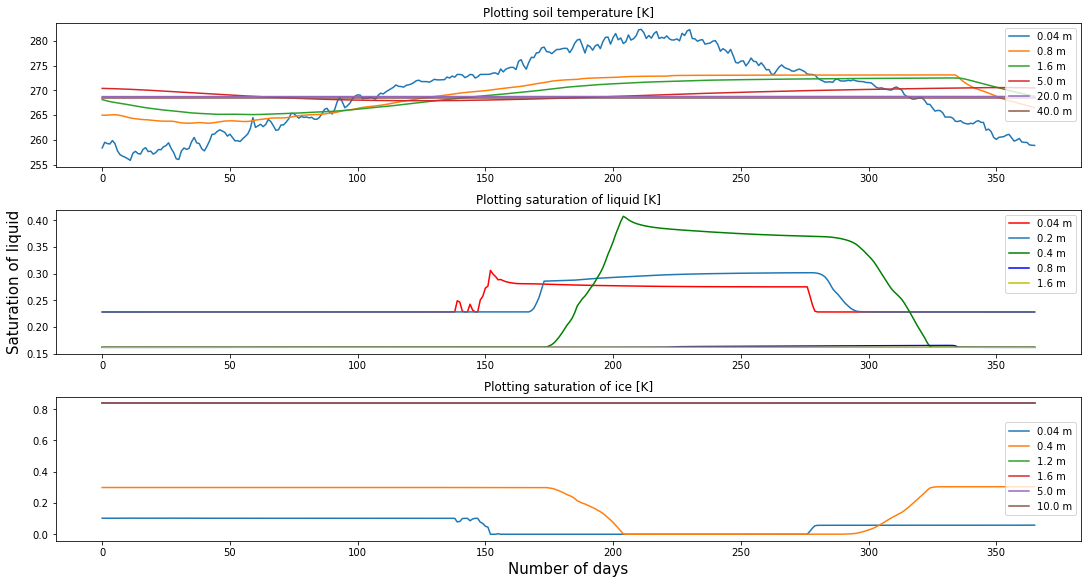

In [56]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case1_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case1_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case1_obs['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(case1_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(case1_obs['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(case1_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case1_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case1_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case1_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case1_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case1_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case1_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case1_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case1_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case1_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

#### Plotting Case 2 results

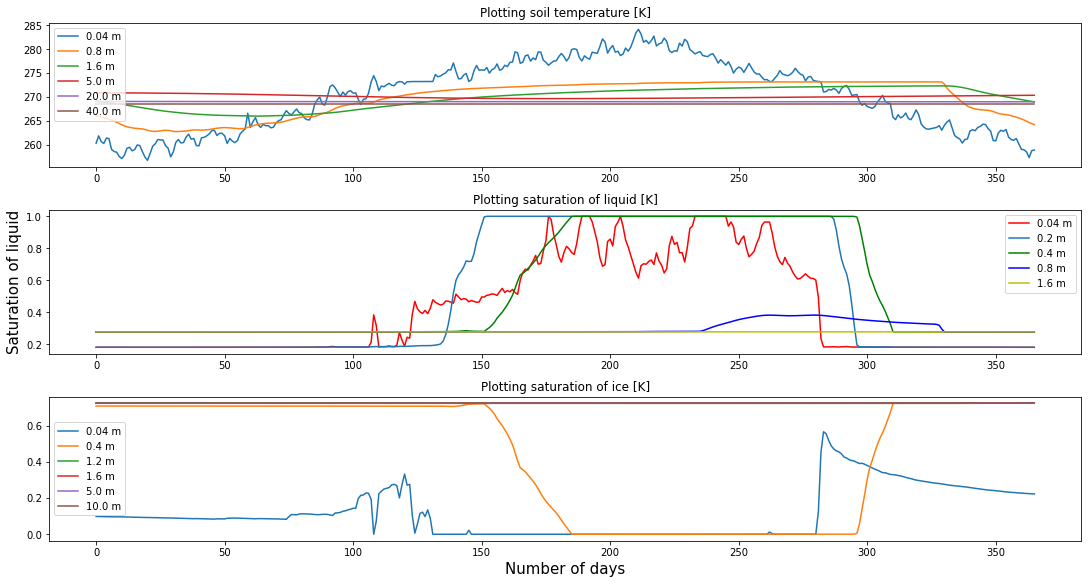

In [57]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case2_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case2_obs['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(case2_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(case2_obs['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(case2_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case2_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case2_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case2_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case2_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case2_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case2_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case2_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case2_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case2_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case2_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

### Surface water balance variables
- evaporation rate [m s^-1], surface-subsurface flux [mol s^-1], surface-precipitation rain [m s^-1], discharge [mol s^-1], precipitation snow [m s^-1], snow melt [m s^-1], thaw depth [m], water table depth [m], ponded depth [m], unfrozen effective depth [m], snow-density [kg m^-3]

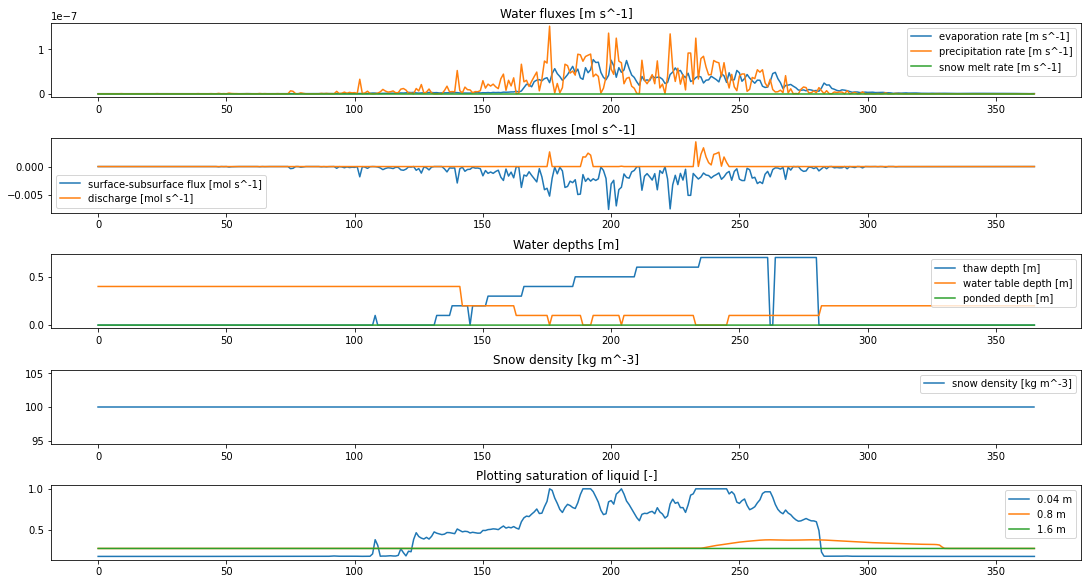

In [69]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water fluxes [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax1.plot(case2_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax1.plot(case2_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.legend()


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Mass fluxes [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['surface-subsurface flux [mol s^-1]'], label="surface-subsurface flux [mol s^-1]")
f2_ax2.plot(case2_obs['discharge [mol s^-1]'], label="discharge [mol s^-1]")
f2_ax2.legend()

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]')
f2_ax3.plot(case2_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case2_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case2_obs['ponded depth [m]'], label='ponded depth [m]')
#f2_ax3.plot(case2_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend()

# Plotting snow density [kg m^-3]
f2_ax4.set_title('Snow density [kg m^-3]')
f2_ax4.plot(case2_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
f2_ax4.legend()

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case2_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case2_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case2_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case2_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case2_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

### Plotting the surface energy balance and water balance parameters:
- Surface energy source [MW m^-2], Conducted energy flux [W m^-2], Latent heat of evaporation [W m^-2], Sensible heat flux [W m^-2], Surface-subsurface energy flux [W m^-2];

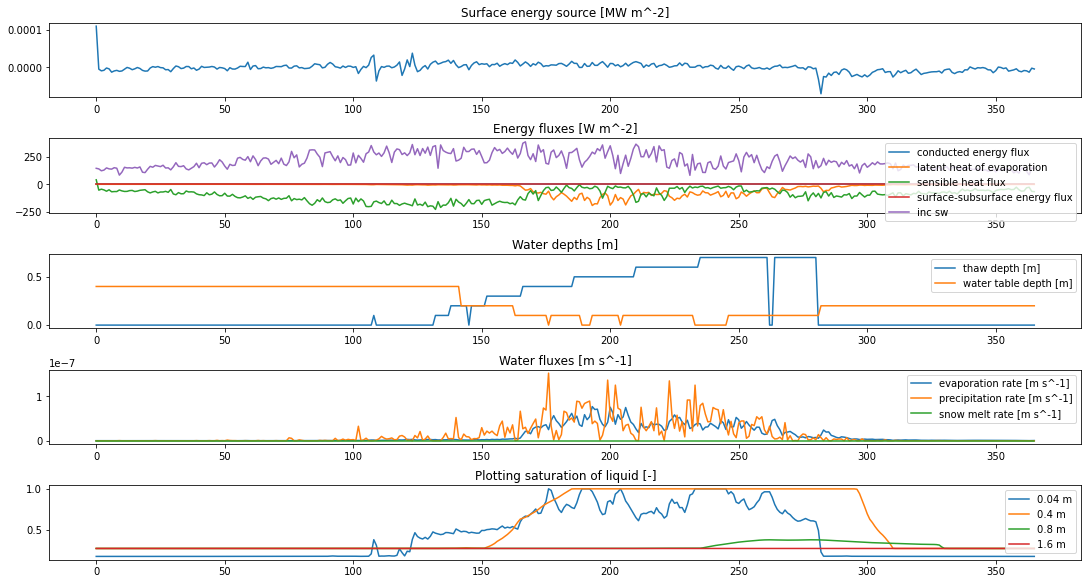

In [87]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Surface energy source
f2_ax1.set_title('Surface energy source [MW m^-2]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case2_obs['surface energy source [MW m^-2]'])

# Plotting Energy fluxes
f2_ax2.set_title('Energy fluxes [W m^-2]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case2_obs['conducted energy flux [W m^-2]'], label='conducted energy flux')
f2_ax2.plot(case2_obs['latent heat of evaporation [W m^-2]'], label="latent heat of evaporation")
f2_ax2.plot(case2_obs['sensible heat flux [W m^-2]'], label="sensible heat flux")
f2_ax2.plot(case2_obs['surface-subsurface energy flux [W m^-2]'], label="surface-subsurface energy flux")
f2_ax2.plot(data_AWS_input_cyclic_Case3['Incoming shortwave radiation (W/m^2)'].values, label="inc sw")
f2_ax2.legend()


# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('Water depths [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case2_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case2_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.legend()

# Plotting water fluxes
f2_ax4.set_title('Water fluxes [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case2_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax4.plot(case2_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax4.plot(case2_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax4.legend()

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case2_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax5.plot(case2_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case2_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case2_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case2_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case2_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()


#### Plotting case3

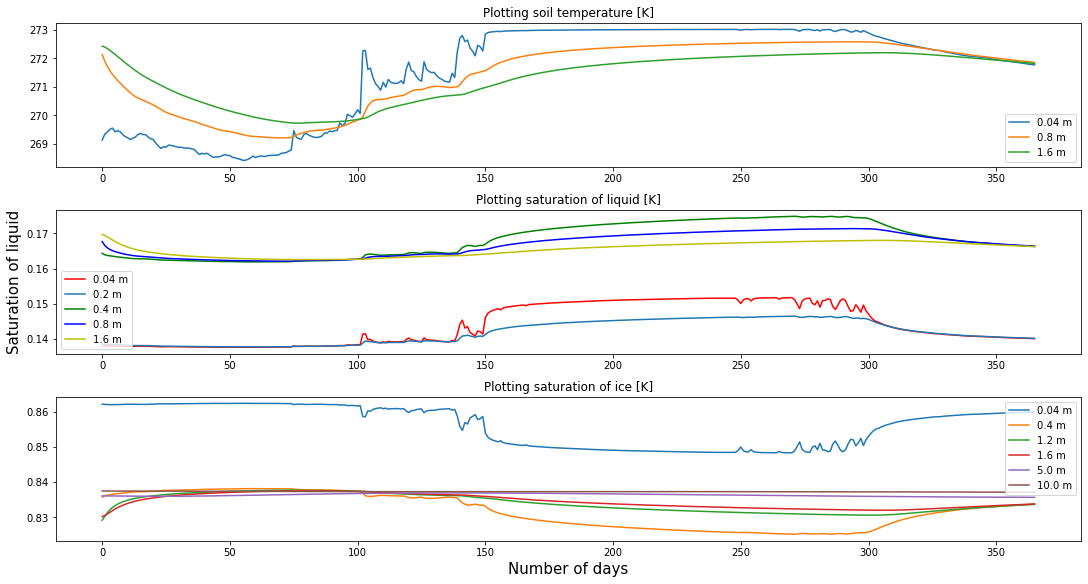

In [16]:
### Plotting the final results (mesured vs simulated) along with the parameters:

fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_case1['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_case1['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(case3_obs['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_case1['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(case3_obs['point -1.6 temperature [K]'],label='1.6 m')
#f2_ax1.plot(case3_obs['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_case1['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(case3_obs['point -20.0 temperature [K]'],label='20.0 m')
#f2_ax1.plot(case3_obs['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(case3_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(case3_obs['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(case3_obs['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(case3_obs['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_case1['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_case1['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(case3_obs['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_case1['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(case3_obs['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(case3_obs['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(case3_obs['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(case3_obs['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()

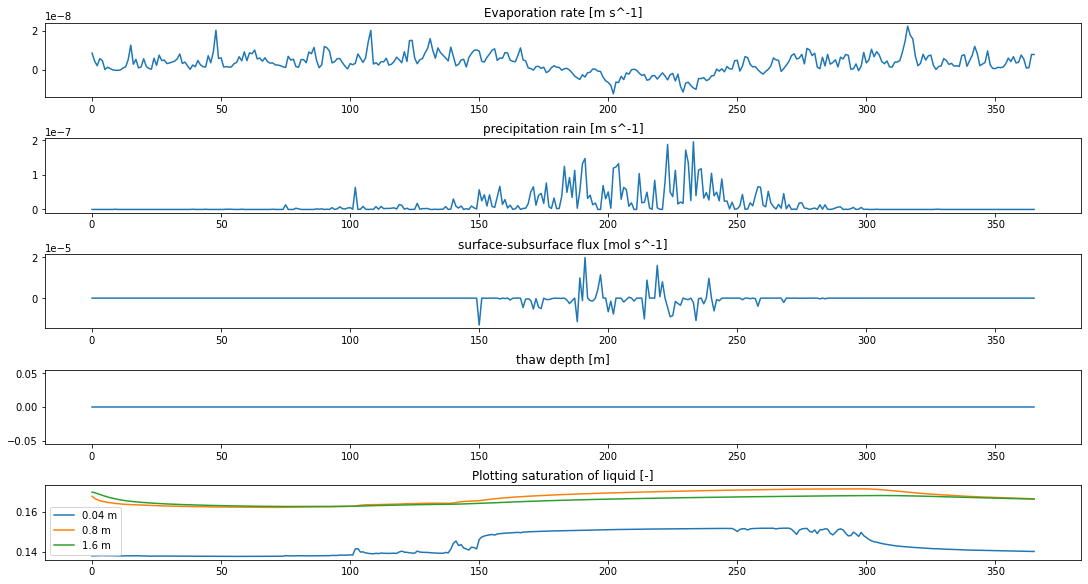

In [17]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

### Surface water balance variables
- evaporation rate [m s^-1], surface-subsurface flux [mol s^-1], surface-precipitation rain [m s^-1], discharge [mol s^-1], precipitation snow [m s^-1], snow melt [m s^-1], thaw depth [m], water table depth [m], ponded depth [m], unfrozen effective depth [m], snow-density [kg m^-3]

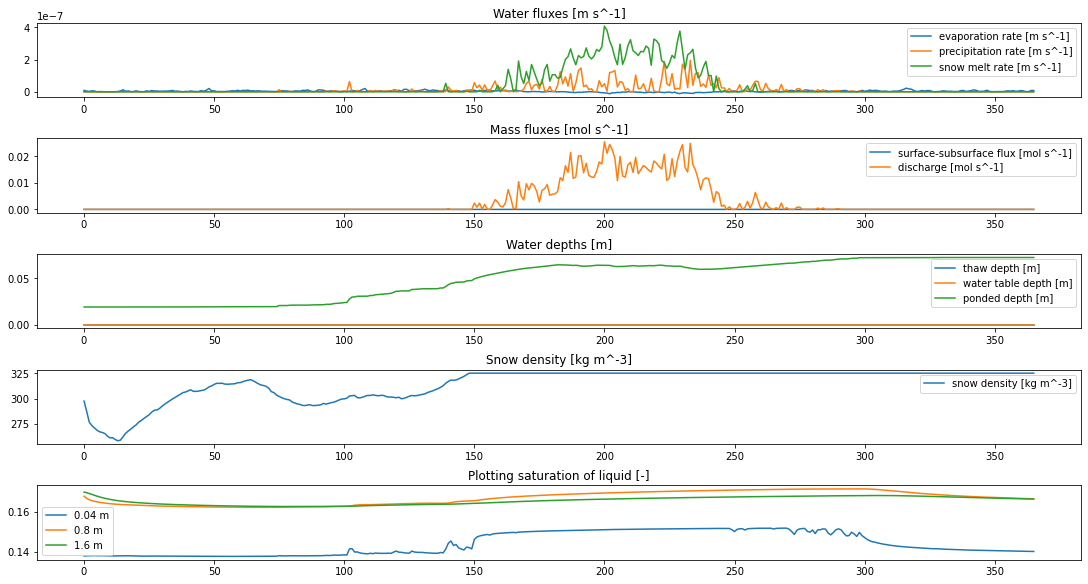

In [84]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting water fluxes
f2_ax1.set_title('Water fluxes [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax1.plot(case3_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax1.plot(case3_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax1.legend()


# Plotting mass fluxes [mol s^-1]
f2_ax2.set_title('Mass fluxes [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['surface-subsurface flux [mol s^-1]'], label="surface-subsurface flux [mol s^-1]")
f2_ax2.plot(case3_obs['discharge [mol s^-1]'], label="discharge [mol s^-1]")
f2_ax2.legend()

# Plotting depths [m]
f2_ax3.set_title('Water depths [m]')
f2_ax3.plot(case3_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case3_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case3_obs['ponded depth [m]'], label='ponded depth [m]')
#f2_ax3.plot(case3_obs['unfrozen effective depth [m]'], label='unfrozen effective depth [m]')
f2_ax3.legend()

# Plotting snow density [kg m^-3]
f2_ax4.set_title('Snow density [kg m^-3]')
f2_ax4.plot(case3_obs['snow-density [kg m^-3]'], label='snow density [kg m^-3]')
f2_ax4.legend()

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

### Plotting the surface energy balance and water balance parameters:
- Surface energy source [MW m^-2], Conducted energy flux [W m^-2], Latent heat of evaporation [W m^-2], Sensible heat flux [W m^-2], Surface-subsurface energy flux [W m^-2];

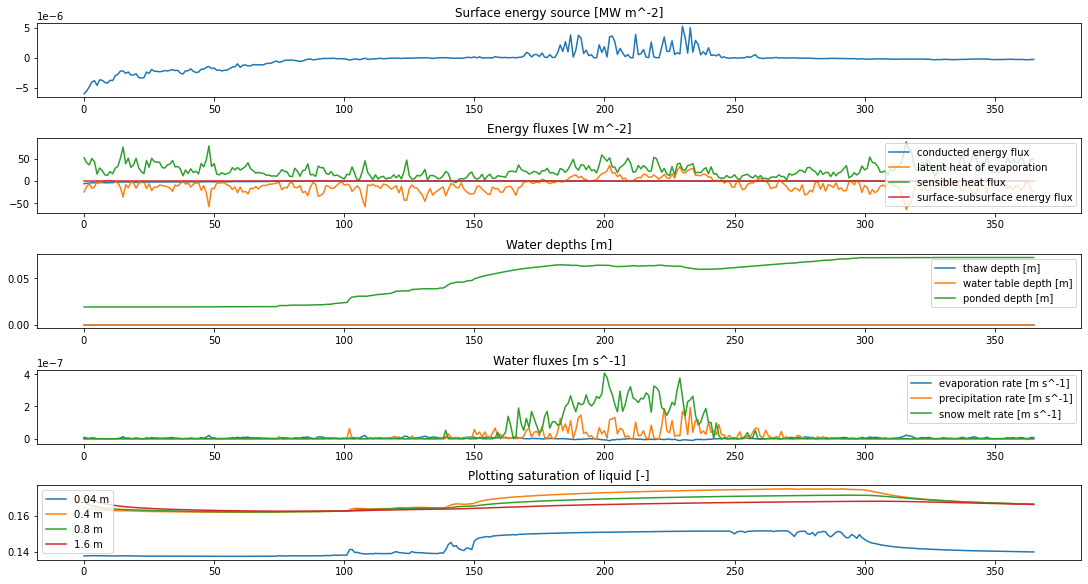

In [86]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Surface energy source
f2_ax1.set_title('Surface energy source [MW m^-2]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['surface energy source [MW m^-2]'])

# Plotting Energy fluxes
f2_ax2.set_title('Energy fluxes [W m^-2]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['conducted energy flux [W m^-2]'], label='conducted energy flux')
f2_ax2.plot(case3_obs['latent heat of evaporation [W m^-2]'], label="latent heat of evaporation")
f2_ax2.plot(case3_obs['sensible heat flux [W m^-2]'], label="sensible heat flux")
f2_ax2.plot(case3_obs['sensible heat flux [W m^-2]'], label="sensible heat flux")
#f2_ax2.plot(case3_obs['surface-subsurface energy flux [W m^-2]'], label="surface-subsurface energy flux")
f2_ax2.legend()


# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('Water depths [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['thaw depth [m]'], label='thaw depth [m]')
f2_ax3.plot(case3_obs['water table depth [m]'], label='water table depth [m]')
f2_ax3.plot(case3_obs['ponded depth [m]'], label='ponded depth [m]')
f2_ax3.legend()

# Plotting water fluxes
f2_ax4.set_title('Water fluxes [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['evaporation rate [m s^-1]'], label='evaporation rate [m s^-1]')
f2_ax4.plot(case3_obs['precipitation rain [m s^-1]'], label='precipitation rate [m s^-1]')
f2_ax4.plot(case3_obs['snow melt [m s^-1]'], label='snow melt rate [m s^-1]')
f2_ax4.legend()

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
f2_ax5.plot(case3_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()


### Plotting the results with measured values

Text(0.5, 0, 'Days')

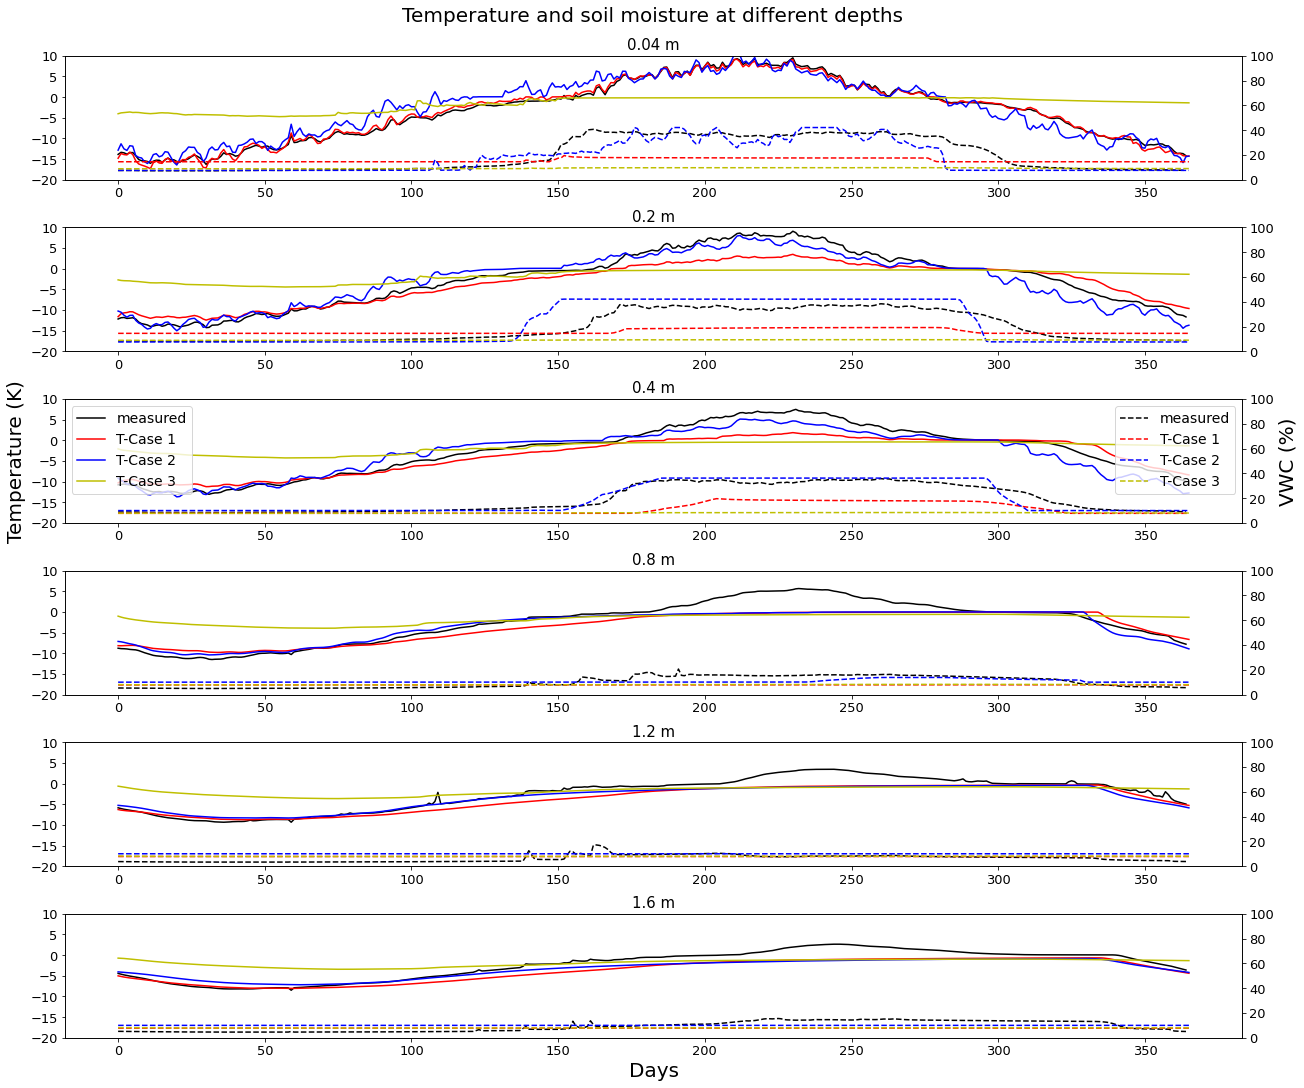

In [18]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Temperature and soil moisture at different depths', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS_cyclic[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(case1_obs[f'Soil temperature at - {depth} m (°C)'], 'r', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(case2_obs[f'Soil temperature at - {depth} m (°C)'], 'b', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(case3_obs[f'Soil temperature at - {depth} m (°C)'], 'y', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS_cyclic[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(case1_obs[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'T-Case 1')
    ax2.plot(case2_obs[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'T-Case 2')
    ax2.plot(case3_obs[f'Soil moisture at - {depth} m (%)'], 'y--', label=f'T-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(13)
    
    if j == 2:
        locals()['f2_ax'+str(j+1)].legend(fontsize=14, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (K)', fontsize=20)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=14, loc=1)  
        ax2.set_ylabel('VWC (%)', fontsize=20)

f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

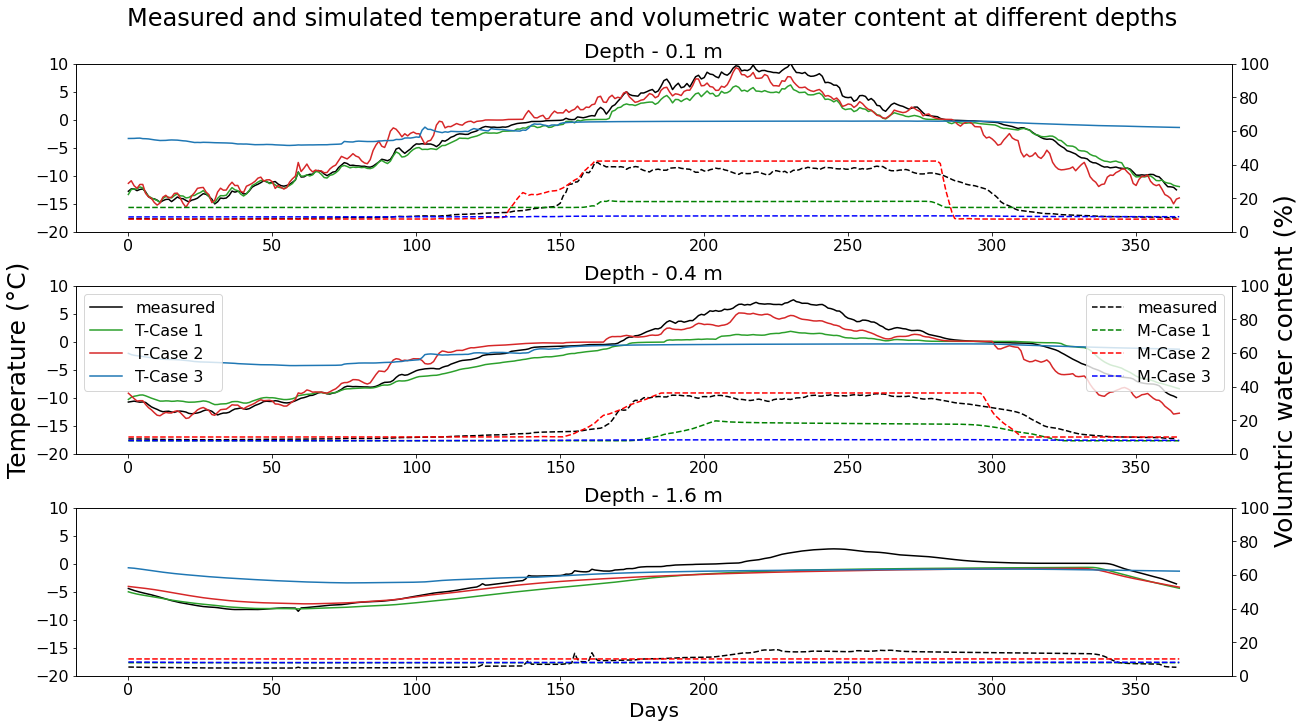

In [19]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(18,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
#f2_ax4 = fig2.add_subplot(spec2[3, 0])
#f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Measured and simulated temperature and volumetric water content at different depths', fontsize=24)


depths = [0.1, 0.4, 1.6]


for j, depth in enumerate(depths):
    
    locals()['f2_ax'+str(j+1)].plot(df_obs_AWS_cyclic[f'Soil temperature at - {depth} m (°C)'], 'k', label=f'measured')
    locals()['f2_ax'+str(j+1)].plot(case1_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:green', label=f'T-Case 1')
    locals()['f2_ax'+str(j+1)].plot(case2_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:red', label=f'T-Case 2')
    locals()['f2_ax'+str(j+1)].plot(case3_obs[f'Soil temperature at - {depth} m (°C)'], 'tab:blue', label=f'T-Case 3')
    #locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim_4[x:x+1096].values, 'g', label=f'T-Case 3')
    locals()['f2_ax'+str(j+1)].set_title(f'Depth - {depth} m', fontsize=20)
    #locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(-20,10)
    
    ax2 = locals()['f2_ax'+str(j+1)].twinx()
    
    color = 'tab:blue'
    ax2.plot(df_obs_AWS_cyclic[f'Soil moisture at - {depth} m (%)'], 'k--', label=f'measured')
    ax2.plot(case1_obs[f'Soil moisture at - {depth} m (%)'], 'g--', label=f'M-Case 1')
    ax2.plot(case2_obs[f'Soil moisture at - {depth} m (%)'], 'r--', label=f'M-Case 2')
    ax2.plot(case3_obs[f'Soil moisture at - {depth} m (%)'], 'b--', label=f'M-Case 3')
    #ax2.plot(time_period, mois_sim_4[x:x+1096].values, 'g--', label=f'M-Case 3')
    ax2.set_ylim(0,100)
    
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(16)
    for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        label.set_fontsize(16)
    
    if j == 1:
        locals()['f2_ax'+str(j+1)].legend(fontsize=16, loc=2)  
        locals()['f2_ax'+str(j+1)].set_ylabel('Temperature (°C)', fontsize=25)
        #locals()['f2_ax'+str(j+1)].set_xlabel('Days', fontsize=20)

        ax2.legend(fontsize=16, loc=1)  
        ax2.set_ylabel('Volumtric water content (%)', fontsize=25)

f2_ax3.set_xlabel('Days', fontsize=20)

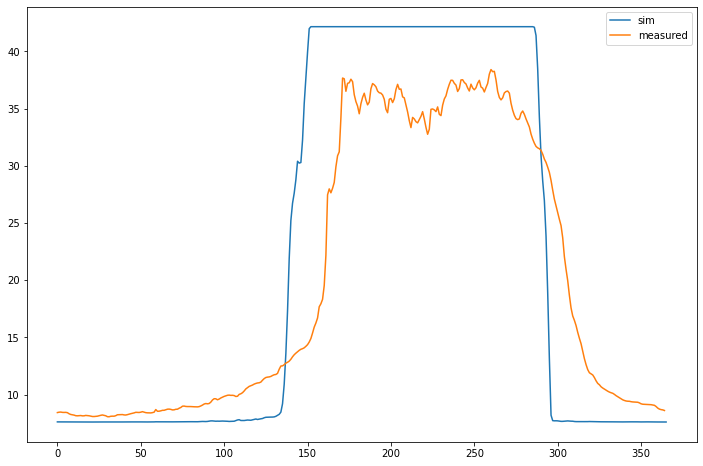

In [20]:
plt.figure(figsize=(12,8))
plt.plot(case2_obs['Soil moisture at - 0.2 m (%)'],label='sim')
plt.plot(df_obs_AWS_cyclic['Soil moisture at - 0.2 m (%)'],label='measured')
plt.legend()

### Plotting the surface energy balance variables:

In [ ]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(case3_obs['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(case3_obs['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(case3_obs['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(case3_obs['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(case1_obs['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(case3_obs['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(case1_obs['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(case1_obs['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(case3_obs['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(case1_obs['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(case3_obs['point -1.6 saturation liquid'],label='1.6 m')
#f2_ax5.plot(case3_obs['point -5.0 saturation liquid'],label='5.0 m')
#f2_ax5.plot(case3_obs['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(case1_obs['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()